<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

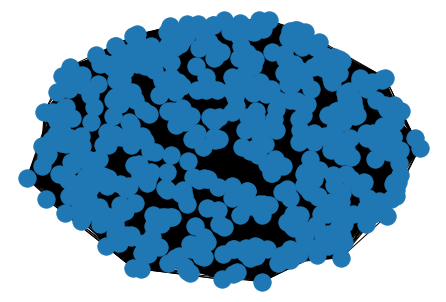

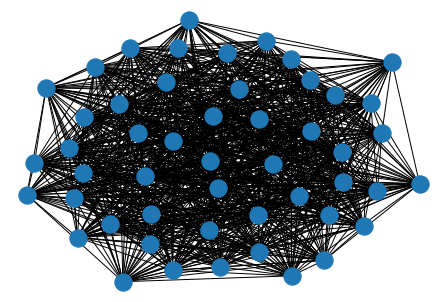

In [1]:
#Erdos-Renyi Graph in Networkx
import random
from networkx import nx
import matplotlib.pyplot as plt

N = 500  # 10 nodes
K = 125000  # 1000 agents
#M = 30  # 30 edges
NN = 50


#Graph = nx.gnm_random_graph(N, M)

P = .5 #Probabibilty for Node Connection in random graph
PP = .8
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#!jupyter notebook --generate-config

In [3]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [4]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [5]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 1 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 [1 1 0 ... 0 0 1]
 ...
 [1 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]]
[[0 1 1 ... 1 1 0]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 0]
 ...
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]]


In [6]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
print(Node)
print(len(Node))


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 102: [], 103: [], 104: [], 105: [], 106: [], 107: [], 108: [], 109: [], 110: [], 111: [], 112: [], 113: [], 114: [], 115: [], 116: [], 117: [], 118: [], 119: [], 120: [], 121: [], 122: [],

In [7]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=random.uniform(0,1)
    Node[i*NN+j].append({'Viral_load' : Viral_load})
print(Node)
print(len(Node))


{0: [{'Viral_load': 0.5675401686133015}], 1: [{'Viral_load': 0.65519313845753}], 2: [{'Viral_load': 0.07247567335327187}], 3: [{'Viral_load': 0.2656648246116857}], 4: [{'Viral_load': 0.20693734478116133}], 5: [{'Viral_load': 0.6382026570713648}], 6: [{'Viral_load': 0.2366796909047849}], 7: [{'Viral_load': 0.8842093944200483}], 8: [{'Viral_load': 0.3738450095067304}], 9: [{'Viral_load': 0.20845711630651642}], 10: [{'Viral_load': 0.5023024708071823}], 11: [{'Viral_load': 0.03470946130506558}], 12: [{'Viral_load': 0.41917812193310544}], 13: [{'Viral_load': 0.956080043329852}], 14: [{'Viral_load': 0.04229700516154922}], 15: [{'Viral_load': 0.6259357063988629}], 16: [{'Viral_load': 0.8838408749182282}], 17: [{'Viral_load': 0.7414101237067628}], 18: [{'Viral_load': 0.6840601405184036}], 19: [{'Viral_load': 0.41816531747908114}], 20: [{'Viral_load': 0.9139229285358855}], 21: [{'Viral_load': 0.5785415731981494}], 22: [{'Viral_load': 0.24108476854727845}], 23: [{'Viral_load': 0.6561838451625865

In [8]:
#Initailizing randomly infection state [0 shows Recovered, 1 shows Susceptible, and 2 shows Infected]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.randint(0,2)
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
  else:
    Rand_nodeN2=Rand_nodeN
  
  Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
  else:
    First_nodeN2=First_nodeN

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
  else:
    Second_nodeN2=Second_nodeN
  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
#print(Agent)

{0: [{'Viral_load': 0.5675401686133015}, {4194: 1}, {85802: 1}, {110101: 2}, {112873: 0}], 1: [{'Viral_load': 0.65519313845753}, {25257: 1}, {42745: 0}, {44571: 1}, {45078: 1}, {49162: 0}, {77272: 0}, {106617: 2}], 2: [{'Viral_load': 0.07247567335327187}, {20412: 1}, {73428: 0}, {82503: 0}], 3: [{'Viral_load': 0.2656648246116857}, {25641: 2}, {89399: 2}], 4: [{'Viral_load': 0.20693734478116133}, {35511: 0}], 5: [{'Viral_load': 0.6382026570713648}, {25424: 2}, {40251: 2}, {69757: 0}, {100016: 1}, {124203: 2}], 6: [{'Viral_load': 0.2366796909047849}, {23601: 1}, {28917: 2}, {46291: 0}, {91045: 2}, {107722: 1}, {109345: 1}], 7: [{'Viral_load': 0.8842093944200483}, {26638: 0}, {64301: 0}, {76574: 0}], 8: [{'Viral_load': 0.3738450095067304}, {61775: 0}, {78974: 1}, {117828: 1}], 9: [{'Viral_load': 0.20845711630651642}, {53003: 1}, {74566: 1}, {75317: 1}, {97854: 1}, {105036: 1}], 10: [{'Viral_load': 0.5023024708071823}, {14882: 1}, {70926: 1}, {79004: 1}, {93728: 0}, {108185: 1}], 11: [{'Vi

In [9]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

500
50


In [10]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append(Node[i*len(GraphN.nodes)+j][0])
    count_nomove=0
    count_move=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(1,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent[a_id][1]['Home_node'])
                  if Agent[a_id][3]['First_node'] in Graph.neighbors(Agent[a_id][7]['Current_node']):
                    neighbors.append(Agent[a_id][3]['First_node'])
                  if Agent[a_id][5]['Second_node'] in Graph.neighbors(Agent[a_id][7]['Current_node']) :
                    neighbors.append(Agent[a_id][5]['Second_node'])
                  #print(neighbors)
                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        next = random.choices(neighbors,weights=(.333,.333,.333), k=1)[0]
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(.5,.5), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(1), k=1)[0]
                      if next == Agent[a_id][1]['Home_node']:
                        #print("no movement")
                        count_nomove+=1
                      elif next == Agent[a_id][3]['First_node']:
                        Agent[a_id][7]['Current_node'],Agent[a_id][3]['First_node'] = Agent[a_id][3]['First_node'],Agent[a_id][7]['Current_node']
                        Agent[a_id][8]['Current_nodeN'][0],Agent[a_id][4]['First_nodeN'][0] = Agent[a_id][4]['First_nodeN'][0],Agent[a_id][8]['Current_nodeN'][0]
                        Agent[a_id][8]['Current_nodeN'][1],Agent[a_id][4]['First_nodeN'][1] = Agent[a_id][4]['First_nodeN'][1],Agent[a_id][8]['Current_nodeN'][1]
                        Agent[a_id][8]['Current_nodeN'][2],Agent[a_id][4]['First_nodeN'][2] = Agent[a_id][4]['First_nodeN'][2],Agent[a_id][8]['Current_nodeN'][2]
                        count_move+=1
                      else:
                        Agent[a_id][7]['Current_node'],Agent[a_id][5]['Second_node'] = Agent[a_id][5]['Second_node'],Agent[a_id][7]['Current_node']
                        Agent[a_id][8]['Current_nodeN'][0],Agent[a_id][6]['Second_nodeN'][0] = Agent[a_id][6]['Second_nodeN'][0],Agent[a_id][8]['Current_nodeN'][0]
                        Agent[a_id][8]['Current_nodeN'][1],Agent[a_id][6]['Second_nodeN'][1] = Agent[a_id][6]['Second_nodeN'][1],Agent[a_id][8]['Current_nodeN'][1]
                        Agent[a_id][8]['Current_nodeN'][2],Agent[a_id][6]['Second_nodeN'][2] = Agent[a_id][6]['Second_nodeN'][2],Agent[a_id][8]['Current_nodeN'][2]
                        count_move+=1
                        
                      nextn = random.choice(Agent[a_id][8]['Current_nodeN'])
                      if nextn == Agent[a_id][8]['Current_nodeN'][1]:
                        Agent[a_id][8]['Current_nodeN'][1],Agent[a_id][8]['Current_nodeN'][0] = Agent[a_id][8]['Current_nodeN'][0],Agent[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent[a_id][8]['Current_nodeN'][2] :
                        Agent[a_id][8]['Current_nodeN'][2],Agent[a_id][8]['Current_nodeN'][0] = Agent[a_id][8]['Current_nodeN'][0],Agent[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent[a_id][8]['Current_nodeN'][0]=Agent[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(Node[cur][agent])
          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    print("count_no_movements",count_nomove)
    print("count_movements",count_move)
    return Node,Node_next

In [11]:
Node_n=Node.copy() 
for j in range(250):
  Node_p,Node_n = random_walk(Graph,GraphN,Node_n,1,1) 
  count=0
  for i in range(len(Node_p)):
    count+=len(Node_p[i]) - 1
  #print(count)
  #print(Node_p)
  #print(Node_n)
  print(j)


count_no_movements 41867
count_movements 83133
0
count_no_movements 83294
count_movements 41706
1
count_no_movements 97212
count_movements 27788
2
count_no_movements 101898
count_movements 23102
3
count_no_movements 103259
count_movements 21741
4
count_no_movements 104116
count_movements 20884
5
count_no_movements 103868
count_movements 21132
6
count_no_movements 104106
count_movements 20894
7
count_no_movements 104115
count_movements 20885
8
count_no_movements 104205
count_movements 20795
9
count_no_movements 104047
count_movements 20953
10
count_no_movements 104158
count_movements 20842
11
count_no_movements 104140
count_movements 20860
12
count_no_movements 104203
count_movements 20797
13
count_no_movements 103860
count_movements 21140
14
count_no_movements 104302
count_movements 20698
15
count_no_movements 104208
count_movements 20792
16
count_no_movements 104028
count_movements 20972
17
count_no_movements 104163
count_movements 20837
18
count_no_movements 104194
count_movements 20